In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/twitter_training.csv')
test_df = pd.read_csv('/content/twitter_validation.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
import re
from wordcloud import WordCloud #visualize the word clouds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer #transform the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # model to be used
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Later, the columns were renamed to represent the given data of tweets. But, with the first 5 rows analysis, it was recognized that positive sentiment was assigned to a "kill" thread related to a videogame. Even with this in consideration, the modeling, in this case, will the same as a traditional NLP project.

In [ ]:
from nltk.corpus import stopwords
stopwords_ = stopwords.words('english')
stopwords_

In [ ]:
train_df.columns=['id','info','sentiment','text']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   info       74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


To prepare the data for the text analysis the same row is modified using the method of `str.lower`. And then each and every tweet is converted to string using str() function

Then, a regex expression is used to erase all the special characters as it is common to have digitation problems on Twitter.

In [ ]:
import re
def preprocess(data):
  ds = data.copy().dropna()
  ds.columns = ['id','info','sentiment','text']
  ds["text"]=ds.text.str.lower() #lowercase
  ds["text"]=[str(char) for char in ds.text] #converting all to string
  ds["text"]=ds.text.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

  return ds

In [ ]:
train_data = preprocess(train_df)
val_data = preprocess(test_df)

In [ ]:
train_data.head()

,id,info,sentiment,text
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# 2. Plotting word clouds



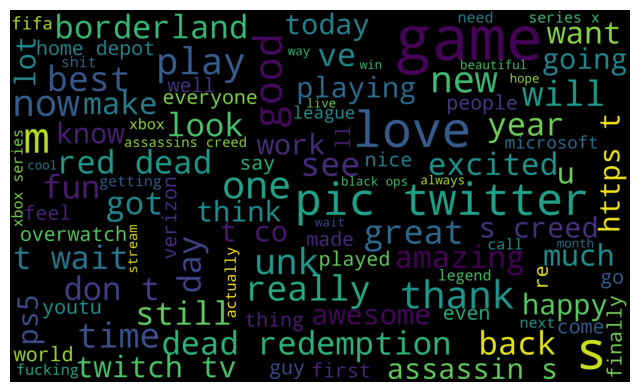

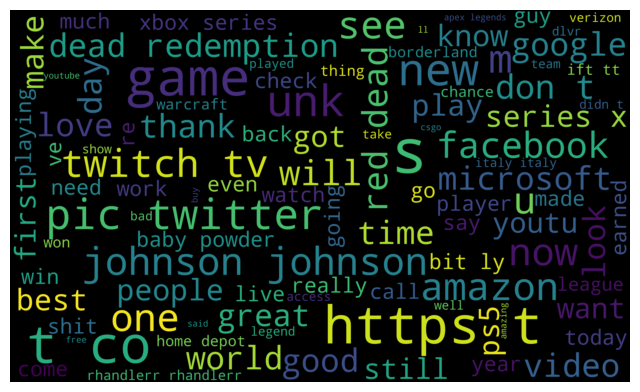

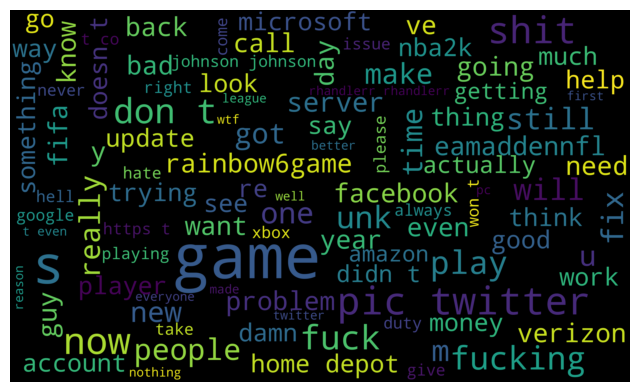

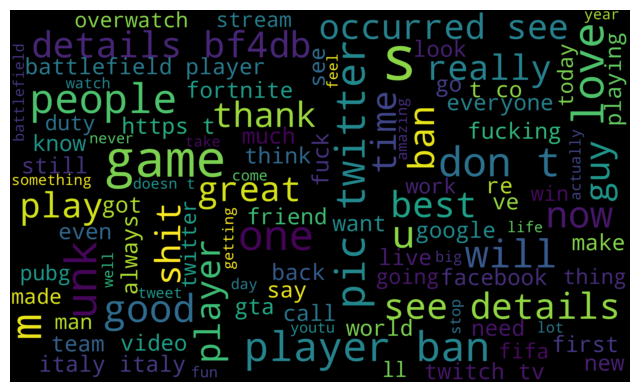

In [ ]:
def plot_word_cloud(data):
  categories = data['sentiment'].unique()
  for category in categories:
    word_cloud_text = ''.join(train_data[train_data["sentiment"]== category].text)
    #Creation of wordcloud
    wordcloud = WordCloud(
        max_font_size=50,
        max_words=100,
        background_color="black",
        scale=10,
        width=500,
        height=300
    ).generate(word_cloud_text)
    #Figure properties
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

plot_word_cloud(train_data)

Negative tweets: Bad words and talk about certain games and industries were important.

Irrelevant tweets: Looked similar to negative ones, which might make it harder to guess right.

Neutral tweets: No bad words, and the important words were different.

Visualization: We put the info in groups by brand (or other info), then made a bar chart showing how many tweets each group had.


In [ ]:
#Count information per category
plot1=train_data.groupby(by=["info","sentiment"]).count().reset_index()
plot1.head()

,info,sentiment,id,text
0,Amazon,Irrelevant,192,192
1,Amazon,Negative,576,576
2,Amazon,Neutral,1236,1236
3,Amazon,Positive,312,312
4,ApexLegends,Irrelevant,192,192


As an interesting fact, the number of modified texts coincides with the id. For this reason, as the ID is unique, the following barplot shows that for games such as MaddenNFL and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

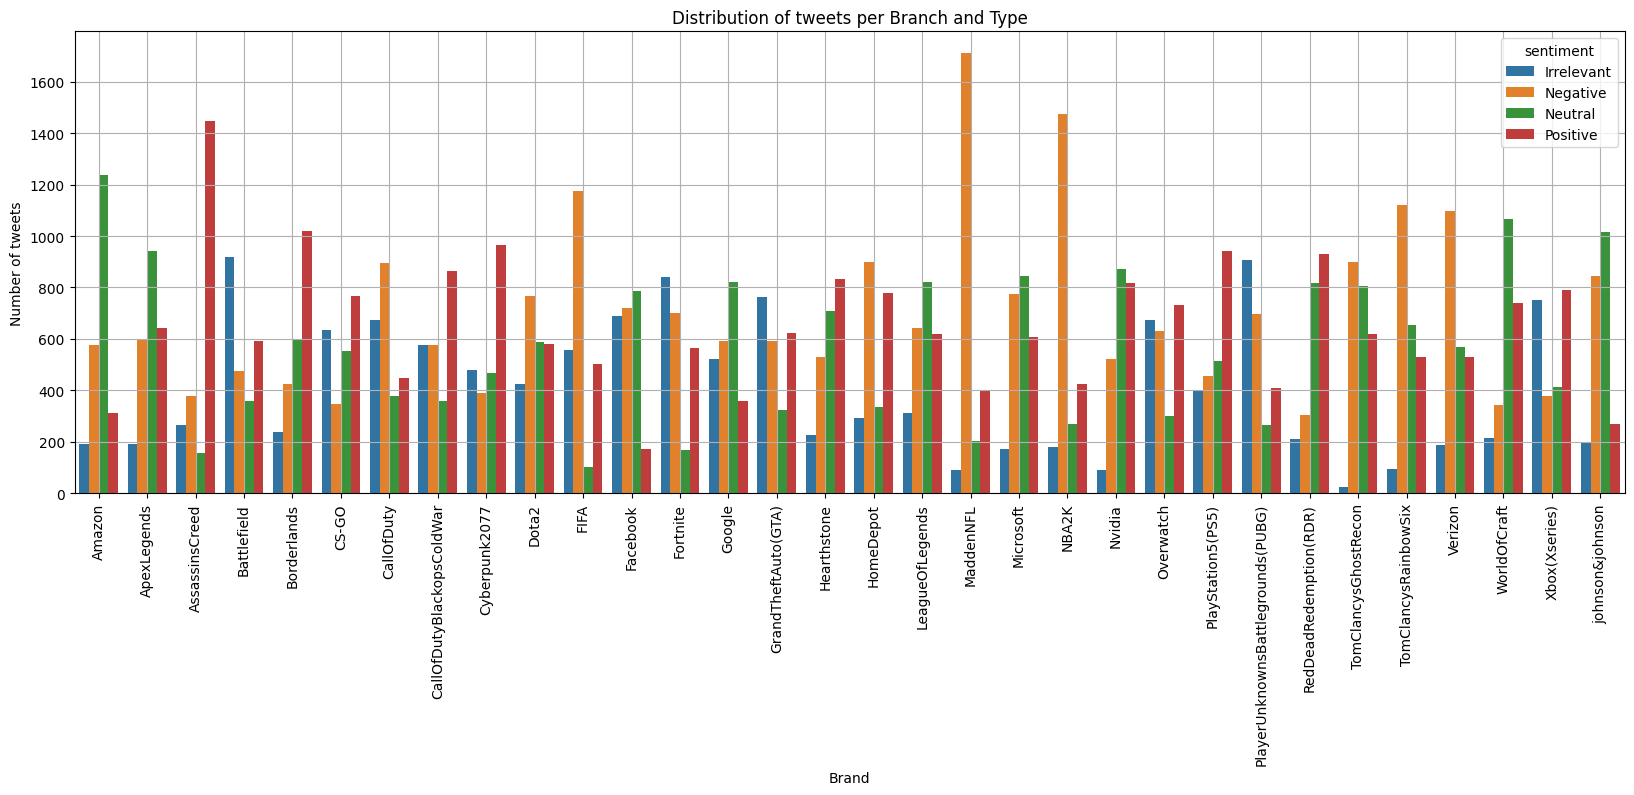

In [ ]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="info",y="id",hue="sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

# 3. Text analysis

With the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_df.shape

(74681, 4)

In [ ]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.text]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


The tokens_text variable groups all the texts by the different words stored on a List.

In [ ]:
tokens_text[1]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

Also, the main English stopwords were saved on an additional variable, to be used in the following modeling.

In [ ]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

# 4. Logistic Regression model

For the main regression model, it was used a simple Logistic Regression of the sklearn library alongside the Bag of Words (BoW) approach. This last method helps to classify and group the relevant data to help the model identify the proper trends.

On this first BoW, the stopwords were considered alongside a default [ngram](https://deepai.org/machine-learning-glossary-and-terms/n-gram) of 1.

![Ngram.png](attachment:dbc1ae72-bb04-42d7-8509-1e7995069310.png)

In [ ]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

Then, the main data was split on train and test datasets alongside the encoding of the words by using the training dataset as a reference:

In [ ]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.text)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_test_bow

<14937x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 161164 stored elements in Compressed Sparse Row format>

In [ ]:
#Labels for train and test encoding
y_train_bow = reviews_train['sentiment']
y_test_bow = reviews_test['sentiment']

The total number of tweets for each category shows that negative and positive are the most registered while the irrelevant is the lowest.

In [ ]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

sentiment
Negative      0.301399
Positive      0.281717
Neutral       0.244895
Irrelevant    0.171989
Name: count, dtype: float64

With this data, the Logistic Regression Model was trained, where accuracy of 81% on the test dataset was obtained while on the validation dataset this value increased to 91%.

In [ ]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.34337551047733


In [ ]:
#Validation data
X_val_bow = bow_counts.transform(val_data.text)
y_val_bow = val_data['sentiment']

In [ ]:
X_val_bow

<999x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 12893 stored elements in Compressed Sparse Row format>

In [ ]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.1931931931932


Finally, another Bag of Words was used. This had an n-gram of 4 while not classifying the stopwords, using all the available information.

The Test dataset got to 90% while on the validation data the accuracy was 98%, showing that this approach was better than the simple n-gram and stopwords model.

In [ ]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.text)
X_test_bow = bow_counts.transform(reviews_test.text)
X_val_bow = bow_counts.transform(val_data.text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_bow

<59744x1428316 sparse matrix of type '<class 'numpy.int64'>'
	with 4142525 stored elements in Compressed Sparse Row format>

In [ ]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)

model2.fit(X_train_bow, y_train_bow)

test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.975430139921


In [ ]:
y_val_bow = val_data['sentiment']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.8988988988989
